In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools

In [2]:
# Seed untuk reproduktifitas
np.random.seed(1507)

# Membaca dataset yang diperbarui
file_path = 'https://raw.githubusercontent.com/syifaghaisani/UAS-Deep-Learning/27fb5a3233e7a8a9c92382478dc3789011bc1a61/tweets-bm%20-labelling.csv'
df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['id_', 'created_at', 'tweetID', 'tweet', 'username', 'Akun', 'id_str',
       'name', 'entity', 'commentcount', 'likes', 'retweets', 'quotes',
       'replies', 'sentiment', 'bidang', 'gender', 'link', 'imageUrl'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_           2124 non-null   int64  
 1   created_at    2124 non-null   object 
 2   tweetID       2124 non-null   object 
 3   tweet         2124 non-null   object 
 4   username      2124 non-null   object 
 5   Akun          2124 non-null   object 
 6   id_str        2124 non-null   int64  
 7   name          2124 non-null   object 
 8   entity        2124 non-null   object 
 9   commentcount  1879 non-null   float64
 10  likes         1602 non-null   float64
 11  retweets      1602 non-null   float64
 12  quotes        1602 non-null   float64
 13  replies       2124 non-null   int64  
 14  sentiment     0 non-null      float64
 15  bidang        0 non-null      float64
 16  gender        0 non-null      float64
 17  link          2124 non-null   object 
 18  imageUrl      2119 non-null 

In [5]:
df.head()

,id_,created_at,tweetID,tweet,username,Akun,id_str,name,entity,commentcount,likes,retweets,quotes,replies,sentiment,bidang,gender,link,imageUrl
0,1,2023-01-01 13:50:44,1609547674893844481,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",TangselSmkn2,AkunMediaMasa/Instansi,1414792059257380864,SMKN2Tangsel,Daihatsu,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,https://twitter.com/TangselSmkn2,https://pbs.twimg.com/profile_images/155974970...
1,2,2023-01-01 11:00:01,1609504712012795907,Shin Tae-yong selaku pelatih kepala Timnas Ind...,PSSI,AkunMediaMasa/Instansi,2363027508,PSSI,Mitsubishi,31.0,1837302.0,159.0,24686.0,31,NaN,NaN,NaN,https://twitter.com/PSSI/status/16095047120127...,https://pbs.twimg.com/media/FlYVvBCaUAA-LHy.jp...
2,3,2023-01-02 9:41:59,1609847465347543042,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,GampongSuzuki,AkunBisnis,971377286,Gampong Suzuki,Suzuki,0.0,140.0,72.0,1510.0,0,NaN,NaN,NaN,https://twitter.com/GampongSuzuki/status/16098...,https://pbs.twimg.com/media/FldTuxJakAQTrqR.jp...
3,4,2023-01-03 7:19:49,1610174074210160641,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,toyotamedan_id,AkunBisnis,732457105,Toyota Medan 082167506001,Toyota,0.0,642.0,1.0,757.0,0,NaN,NaN,NaN,https://twitter.com/toyotamedan_id/status/1610...,https://pbs.twimg.com/profile_images/147098860...
4,5,2023-01-03 2:29:01,1610100893583806465,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,HoldenKlasik,AkunBisnis,1391235014,Suka Mobil Tua,BMW,1.0,154655.0,402.0,96590.0,1,NaN,NaN,NaN,https://twitter.com/HoldenKlasik/status/161010...,https://pbs.twimg.com/media/Flg6NOsaUAAS5FA.jp...


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_           2124 non-null   int64  
 1   created_at    2124 non-null   object 
 2   tweetID       2124 non-null   object 
 3   tweet         2124 non-null   object 
 4   username      2124 non-null   object 
 5   Akun          2124 non-null   object 
 6   id_str        2124 non-null   int64  
 7   name          2124 non-null   object 
 8   entity        2124 non-null   object 
 9   commentcount  1879 non-null   float64
 10  likes         1602 non-null   float64
 11  retweets      1602 non-null   float64
 12  quotes        1602 non-null   float64
 13  replies       2124 non-null   int64  
 14  sentiment     0 non-null      float64
 15  bidang        0 non-null      float64
 16  gender        0 non-null      float64
 17  link          2124 non-null   object 
 18  imageUrl      2119 non-null 

In [7]:
print(df['Akun'].value_counts())

Akun
AkunBisnis                695
AkunPribadi               596
AkunMediaMasa/Instansi    519
Unknown                   314
Name: count, dtype: int64


#**PERBAIKAN MODEL (Model awal ada di bawah)**

#**Tanpa Menghapus Duplikat**

#Epoch 10

In [8]:
# 1. Menghapus angka dan mengubah huruf menjadi lowercase
df['username'] = df['username'].str.replace(r'\d+', '', regex=True).str.lower()

# 2. Menghapus simbol atau karakter spesial
df['username'] = df['username'].str.replace(r'[^\w\s]', '', regex=True)

# 3. Menghapus pengulangan kata
df['username'] = df['username'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

# 4. Memisahkan kata berdasarkan suku kata
# Misalnya, gunakan pendekatan sederhana memisahkan berdasarkan vokal
def split_syllables(word):
    syllables = re.findall(r'[^aiueo]*[aiueo]+(?:[^aiueo]|$)', word)
    return ' '.join(syllables)

df['username'] = df['username'].apply(lambda x: ' '.join([split_syllables(word) for word in x.split()]))

# Definisikan kriteria pengelompokan
personal_keywords = ["itsme", "mas", "pak", "bu", "bapak", "bunda", "bang", "bung", "muhammad", "muhamad"]

business_keywords = ["id", "honda", "yamaha", "daihatsu", "wuling", "toyota", "hyundai", "suzuki", "mobil", "jok", "bisnis",
                     "bmw", "klasik", "mobil", "indonesia"]

media_keywords = ["smk", "polri", "tv", "news", "online", "post", "kota", "harian", "fm", "radio", "tempo", "tribun", "kompas",
                  "detik", "berita", "tirtoid", "solopos", "antara", "media", "polda", "polsek", "dpc", "dpp", "liputan",
                  "times", "jpnn", "cnn", "coid", "harian", "dotco", "cnbc", "info", "detik", "tribun", "cnn"]

unknown_keywords = ["photo", "php", "groups", "reel"]

def categorize_username(username):
    if any(keyword in username for keyword in personal_keywords):
        return 'AkunPribadi'
    elif any(keyword in username for keyword in business_keywords):
        return 'AkunBisnis'
    elif any(keyword in username for keyword in media_keywords):
        return 'AkunMediaMasa/Institusi'
    elif any(keyword in username for keyword in unknown_keywords):
        return 'Unknown'
    elif sum(c.isdigit() for c in username) > sum(c.isalpha() for c in username):
        return 'Unknown'
    else:
        return 'Unknown'

# Terapkan fungsi pengelompokan pada dataset
df['account_type'] = df['username'].apply(categorize_username)

# Encode label
label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])

# Tokenize username
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['username'])
sequences = tokenizer.texts_to_sequences(df['username'])
X = pad_sequences(sequences, maxlen=15)  # 15 adalah panjang maksimal username yang akan dipertimbangkan
y = df['account_type']

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1507)

# Bangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=15))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 kelas output

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Menyimpan model terbaik berdasarkan akurasi validasi
checkpoint = ModelCheckpoint('lstm_twitter_awal_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=224, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.80471, saving model to lstm_twitter_awal_model.h5
8/8 - 12s - loss: 1.2760 - accuracy: 0.7975 - val_loss: 1.0566 - val_accuracy: 0.8047 - 12s/epoch - 2s/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.7648 - accuracy: 0.8364 - val_loss: 0.8794 - val_accuracy: 0.8047 - 821ms/epoch - 103ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.6193 - accuracy: 0.8364 - val_loss: 0.6388 - val_accuracy: 0.8047 - 795ms/epoch - 99ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.5520 - accuracy: 0.8364 - val_loss: 0.6191 - val_accuracy: 0.8047 - 812ms/epoch - 102ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.80471
8/8 - 2s - loss: 0.5182 - accuracy: 0.8364 - val_loss: 0.6310 - val_accuracy: 0.8047 - 2s/epoch - 206ms/step
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.80471
8/8 - 2s - loss: 0.4931 - accuracy: 0.8364 - val_loss: 0.5730 - val_accuracy: 0.8047 - 2s/epoch - 222ms/step
Epoch 7/10

Epoch 7: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.4627 - accuracy: 0.8364 - val_loss: 0.5385 - val_accuracy: 0.

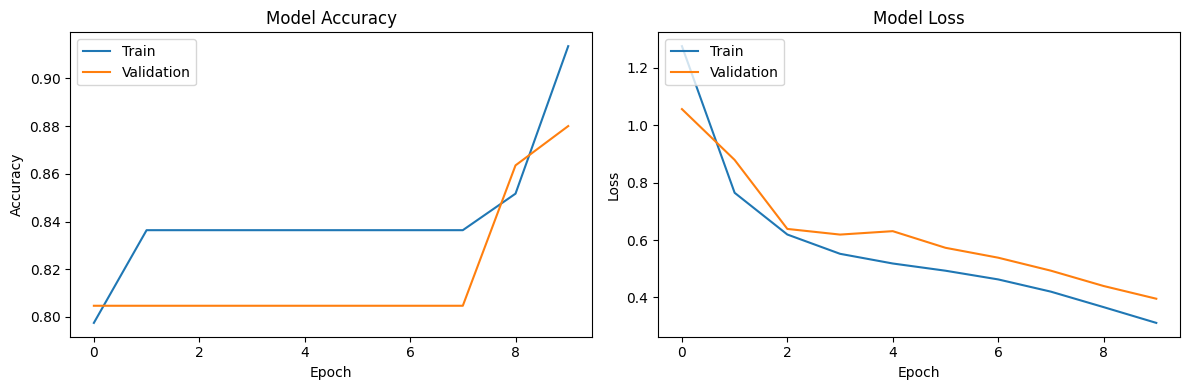

In [9]:
# Define the plot_training_history function
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualisasi Loss dan Akurasi
plot_training_history(history) # Call the function after it's defined

#Epoch 20

In [10]:
# 1. Menghapus angka dan mengubah huruf menjadi lowercase
df['username'] = df['username'].str.replace(r'\d+', '', regex=True).str.lower()

# 2. Menghapus simbol atau karakter spesial
df['username'] = df['username'].str.replace(r'[^\w\s]', '', regex=True)

# 3. Menghapus pengulangan kata
df['username'] = df['username'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

# 4. Memisahkan kata berdasarkan suku kata
# Misalnya, gunakan pendekatan sederhana memisahkan berdasarkan vokal
def split_syllables(word):
    syllables = re.findall(r'[^aiueo]*[aiueo]+(?:[^aiueo]|$)', word)
    return ' '.join(syllables)

df['username'] = df['username'].apply(lambda x: ' '.join([split_syllables(word) for word in x.split()]))

# Definisikan kriteria pengelompokan
personal_keywords = ["itsme", "mas", "pak", "bu", "bapak", "bunda", "bang", "bung", "muhammad", "muhamad", "ahmad", "bambang",
                     "tono", "raden", "fajar", "pakde", "paman", "anto", "ridwan", "ayah", "abi", "anton", "agus", "yusuf",
                     "tarto", "roby", "iwan", "boy", "dewi", "ayu", "ratna", "wati", "putri", "jeng", "susan", "bunda",
                     "nissa", "cintya", "indah", "lala", "brigitta", "emak", "nurhayati", "sulastri", "sumiati", "sri",
                     "wahyuni", "sumarni", "sunarti", "siti", "aminah", "ernawati", "kartini", "sutrisno", "slamet",
                     "mulyadi", "herman", "supardi", "ismail", "suprianto", "suparman", "junaidi", "wahyudi"]

business_keywords = ["id", "honda", "yamaha", "daihatsu", "wuling", "toyota", "hyundai", "suzuki", "mobil", "jok", "bisnis",
                     "bmw", "klasik", "mobil", "indonesia"]

media_keywords = ["smk", "polri", "tv", "news", "online", "post", "kota", "harian", "fm", "radio", "tempo", "tribun", "kompas",
                  "detik", "berita", "tirtoid", "solopos", "antara", "media", "polda", "polsek", "dpc", "dpp", "liputan",
                  "times", "jpnn", "cnn", "coid", "harian", "dotco", "cnbc", "info", "partai", "pks", "pdi", "golkar",
                  "gerindra", "pkb", "nasdem", "demokrat", "hanura", "pkb", "psi", "perindo", "ppp", "pbb", "detik",
                  "tribun", "cnn", "teropongrakyat"]

unknown_keywords = ["photo", "php", "groups", "reel"]

def categorize_username(username):
    if any(keyword in username for keyword in personal_keywords):
        return 'AkunPribadi'
    elif any(keyword in username for keyword in business_keywords):
        return 'AkunBisnis'
    elif any(keyword in username for keyword in media_keywords):
        return 'AkunMediaMasa/Institusi'
    elif any(keyword in username for keyword in unknown_keywords):
        return 'Unknown'
    elif sum(c.isdigit() for c in username) > sum(c.isalpha() for c in username):
        return 'Unknown'
    else:
        return 'Unknown'

# Terapkan fungsi pengelompokan pada dataset
df['account_type'] = df['username'].apply(categorize_username)

# Encode label
label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])

# Tokenize username
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['username'])
sequences = tokenizer.texts_to_sequences(df['username'])
X = pad_sequences(sequences, maxlen=15)  # 15 adalah panjang maksimal username yang akan dipertimbangkan
y = df['account_type']

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1507)

# Bangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=15))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 kelas output

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Menyimpan model terbaik berdasarkan akurasi validasi
checkpoint = ModelCheckpoint('lstm_twitter_fix_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Latih model
history = model.fit(X_train, y_train, epochs=20, batch_size=224, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.80471, saving model to lstm_twitter_fix_model.h5
8/8 - 8s - loss: 1.3138 - accuracy: 0.7145 - val_loss: 1.1604 - val_accuracy: 0.8047 - 8s/epoch - 987ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.80471
8/8 - 2s - loss: 0.8679 - accuracy: 0.8334 - val_loss: 0.7826 - val_accuracy: 0.8047 - 2s/epoch - 205ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.6461 - accuracy: 0.8334 - val_loss: 0.6295 - val_accuracy: 0.8047 - 1s/epoch - 130ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.5628 - accuracy: 0.8334 - val_loss: 0.6147 - val_accuracy: 0.8047 - 1s/epoch - 147ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.80471
8/8 - 2s - loss: 0.5257 - accuracy: 0.8334 - val_loss: 0.6226 - val_accuracy: 0.8047 - 2s/epoch - 268ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.80471
8/8 - 2s - loss: 0.5042 - accuracy: 0.8334 - val_loss: 0.5683 - val_accuracy: 0.8047 - 2s/epoch - 221ms/step
Epoch 7/20

Epoch 7: val_accuracy did not improve from 0.80471
8/8 - 1s - loss: 0.4727 - accuracy: 0.8334 - val_loss: 0.5313 - val_accuracy: 0.8047 - 1

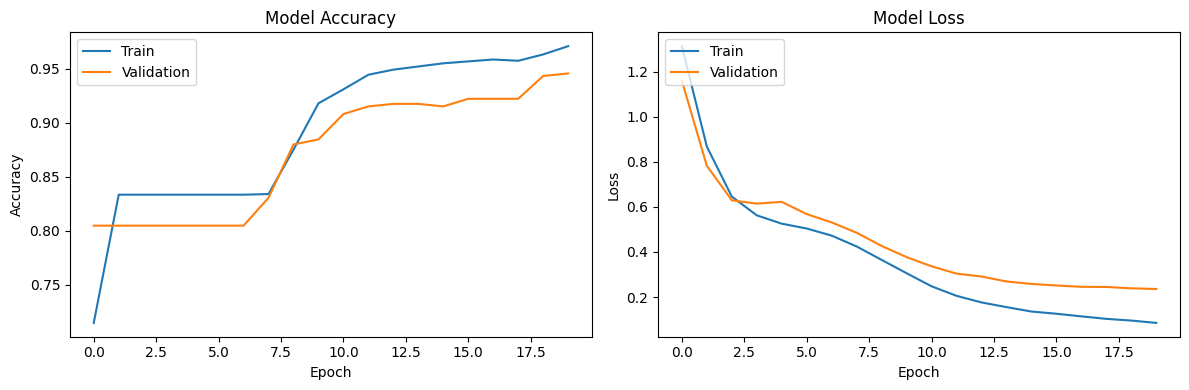

In [11]:
# Define the plot_training_history function
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualisasi Loss dan Akurasi
plot_training_history(history) # Call the function after it's defined

#**MODEL AWAL**

#**Jika Menghapus Duplikat**

In [12]:
# Menghapus duplikat
df.drop_duplicates(subset=['username'], keep='first', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 2122
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_           948 non-null    int64  
 1   created_at    948 non-null    object 
 2   tweetID       948 non-null    object 
 3   tweet         948 non-null    object 
 4   username      948 non-null    object 
 5   Akun          948 non-null    object 
 6   id_str        948 non-null    int64  
 7   name          948 non-null    object 
 8   entity        948 non-null    object 
 9   commentcount  713 non-null    float64
 10  likes         464 non-null    float64
 11  retweets      464 non-null    float64
 12  quotes        464 non-null    float64
 13  replies       948 non-null    int64  
 14  sentiment     0 non-null      float64
 15  bidang        0 non-null      float64
 16  gender        0 non-null      float64
 17  link          948 non-null    object 
 18  imageUrl      943 non-null    obje

In [14]:
print(df['Akun'].value_counts())

Akun
AkunPribadi               521
Unknown                   202
AkunMediaMasa/Instansi    136
AkunBisnis                 89
Name: count, dtype: int64


In [15]:
df.head()

,id_,created_at,tweetID,tweet,username,Akun,id_str,name,entity,commentcount,likes,retweets,quotes,replies,sentiment,bidang,gender,link,imageUrl,account_type
0,1,2023-01-01 13:50:44,1609547674893844481,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",tan gsel,AkunMediaMasa/Instansi,1414792059257380864,SMKN2Tangsel,Daihatsu,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,https://twitter.com/TangselSmkn2,https://pbs.twimg.com/profile_images/155974970...,3
1,2,2023-01-01 11:00:01,1609504712012795907,Shin Tae-yong selaku pelatih kepala Timnas Ind...,pssi,AkunMediaMasa/Instansi,2363027508,PSSI,Mitsubishi,31.0,1837302.0,159.0,24686.0,31,NaN,NaN,NaN,https://twitter.com/PSSI/status/16095047120127...,https://pbs.twimg.com/media/FlYVvBCaUAA-LHy.jp...,3
2,3,2023-01-02 9:41:59,1609847465347543042,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,gam pon gsuz uk i,AkunBisnis,971377286,Gampong Suzuki,Suzuki,0.0,140.0,72.0,1510.0,0,NaN,NaN,NaN,https://twitter.com/GampongSuzuki/status/16098...,https://pbs.twimg.com/media/FldTuxJakAQTrqR.jp...,3
3,4,2023-01-03 7:19:49,1610174074210160641,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,toy ot am ed an _id,AkunBisnis,732457105,Toyota Medan 082167506001,Toyota,0.0,642.0,1.0,757.0,0,NaN,NaN,NaN,https://twitter.com/toyotamedan_id/status/1610...,https://pbs.twimg.com/profile_images/147098860...,0
4,5,2023-01-03 2:29:01,1610100893583806465,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,hol den klas ik,AkunBisnis,1391235014,Suka Mobil Tua,BMW,1.0,154655.0,402.0,96590.0,1,NaN,NaN,NaN,https://twitter.com/HoldenKlasik/status/161010...,https://pbs.twimg.com/media/Flg6NOsaUAAS5FA.jp...,3


#Epoch 10

MENGGUNAKAN DATA YANG SUDAH DIHAPUS DUPLIKATNYA
*   Menghapus angka dan mengubah huruf menjadi lowercase.
*   Menghapus simbol atau karakter spesial.
*   Menghapus pengulangan kata.
*   Memisahkan kata berdasarkan suku kata.

In [16]:
# 1. Menghapus angka dan mengubah huruf menjadi lowercase
df['username'] = df['username'].str.replace(r'\d+', '', regex=True).str.lower()

# 2. Menghapus simbol atau karakter spesial
df['username'] = df['username'].str.replace(r'[^\w\s]', '', regex=True)

# 3. Menghapus pengulangan kata
df['username'] = df['username'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

# 4. Memisahkan kata berdasarkan suku kata
# Misalnya, gunakan pendekatan sederhana memisahkan berdasarkan vokal
def split_syllables(word):
    syllables = re.findall(r'[^aiueo]*[aiueo]+(?:[^aiueo]|$)', word)
    return ' '.join(syllables)

df['username'] = df['username'].apply(lambda x: ' '.join([split_syllables(word) for word in x.split()]))

# Definisikan kriteria pengelompokan
personal_keywords = ["itsme", "mas", "pak", "bu", "bapak", "bunda", "bang", "bung", "muhammad", "muhamad", "ahmad", "bambang",
                     "tono", "raden", "fajar", "pakde", "paman", "anto", "ridwan", "ayah", "abi", "anton", "agus", "yusuf",
                     "tarto", "roby", "iwan", "boy", "dewi", "ayu", "ratna", "wati", "putri", "jeng", "susan", "bunda",
                     "nissa", "cintya", "indah", "lala", "brigitta", "emak", "nurhayati", "sulastri", "sumiati", "sri",
                     "wahyuni", "sumarni", "sunarti", "siti", "aminah", "ernawati", "kartini", "sutrisno", "slamet",
                     "mulyadi", "herman", "supardi", "ismail", "suprianto", "suparman", "junaidi", "wahyudi"]

business_keywords = ["id", "honda", "yamaha", "daihatsu", "wuling", "toyota", "hyundai", "suzuki", "mobil", "jok", "bisnis",
                     "bmw", "klasik", "mobil", "indonesia"]

media_keywords = ["smk", "polri", "tv", "news", "online", "post", "kota", "harian", "fm", "radio", "tempo", "tribun", "kompas",
                  "detik", "berita", "tirtoid", "solopos", "antara", "media", "polda", "polsek", "dpc", "dpp", "liputan",
                  "times", "jpnn", "cnn", "coid", "harian", "dotco", "cnbc", "info", "partai", "pks", "pdi", "golkar",
                  "gerindra", "pkb", "nasdem", "demokrat", "hanura", "pkb", "psi", "perindo", "ppp", "pbb", "detik",
                  "tribun", "cnn", "teropongrakyat"]

unknown_keywords = ["photo", "php", "groups", "reel"]

def categorize_username(username):
    if any(keyword in username for keyword in personal_keywords):
        return 'AkunPribadi'
    elif any(keyword in username for keyword in business_keywords):
        return 'AkunBisnis'
    elif any(keyword in username for keyword in media_keywords):
        return 'AkunMediaMasa/Institusi'
    elif any(keyword in username for keyword in unknown_keywords):
        return 'Unknown'
    elif sum(c.isdigit() for c in username) > sum(c.isalpha() for c in username):
        return 'Unknown'
    else:
        return 'Unknown'

# Terapkan fungsi pengelompokan pada dataset
df['account_type'] = df['username'].apply(categorize_username)

# Encode label
label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])

# Tokenize username
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['username'])
sequences = tokenizer.texts_to_sequences(df['username'])
X = pad_sequences(sequences, maxlen=15)  # 15 adalah panjang maksimal username yang akan dipertimbangkan
y = df['account_type']

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1507)

# Bangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=15))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 kelas output

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Menyimpan model terbaik berdasarkan akurasi validasi
checkpoint = ModelCheckpoint('lstm_twitter_coba_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=224, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.87895, saving model to lstm_twitter_coba_model.h5
4/4 - 4s - loss: 1.3527 - accuracy: 0.6042 - val_loss: 1.2660 - val_accuracy: 0.8789 - 4s/epoch - 1s/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 1.2139 - accuracy: 0.8641 - val_loss: 1.0426 - val_accuracy: 0.8789 - 414ms/epoch - 104ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 0.9306 - accuracy: 0.8641 - val_loss: 0.5930 - val_accuracy: 0.8789 - 733ms/epoch - 183ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 0.5614 - accuracy: 0.8641 - val_loss: 0.5588 - val_accuracy: 0.8789 - 757ms/epoch - 189ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 0.6010 - accuracy: 0.8641 - val_loss: 0.5100 - val_accuracy: 0.8789 - 757ms/epoch - 189ms/step
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 0.5176 - accuracy: 0.8641 - val_loss: 0.4771 - val_accuracy: 0.8789 - 720ms/epoch - 180ms/step
Epoch 7/10

Epoch 7: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 0.5071 - accuracy: 0.8641 - val_loss: 0.5097 - val_accur

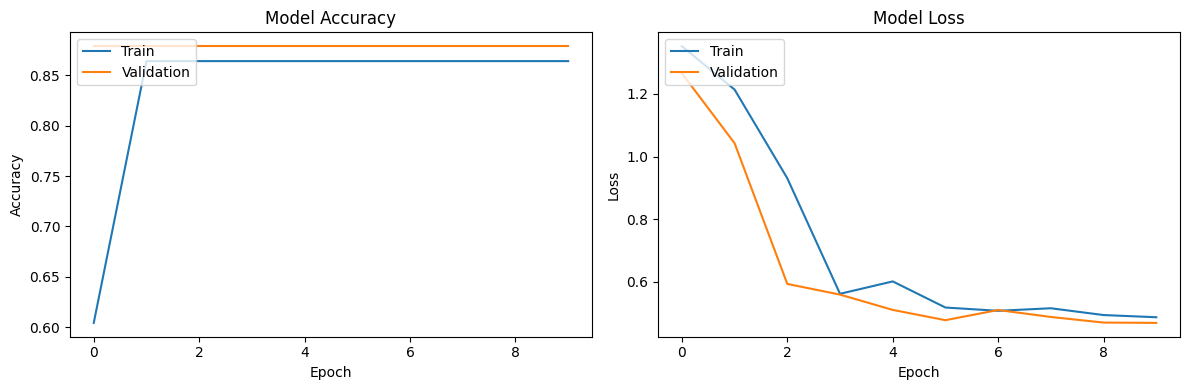

In [17]:
# Define the plot_training_history function
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualisasi Loss dan Akurasi
plot_training_history(history) # Call the function after it's defined


#Epoch 20

In [18]:
# 1. Menghapus angka dan mengubah huruf menjadi lowercase
df['username'] = df['username'].str.replace(r'\d+', '', regex=True).str.lower()

# 2. Menghapus simbol atau karakter spesial
df['username'] = df['username'].str.replace(r'[^\w\s]', '', regex=True)

# 3. Menghapus pengulangan kata
df['username'] = df['username'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

# 4. Memisahkan kata berdasarkan suku kata
# Misalnya, gunakan pendekatan sederhana memisahkan berdasarkan vokal
def split_syllables(word):
    syllables = re.findall(r'[^aiueo]*[aiueo]+(?:[^aiueo]|$)', word)
    return ' '.join(syllables)

df['username'] = df['username'].apply(lambda x: ' '.join([split_syllables(word) for word in x.split()]))

# Definisikan kriteria pengelompokan
personal_keywords = ["itsme", "mas", "pak", "bu", "bapak", "bunda", "bang", "bung", "muhammad", "muhamad", "ahmad", "bambang",
                     "tono", "raden", "fajar", "pakde", "paman", "anto", "ridwan", "ayah", "abi", "anton", "agus", "yusuf",
                     "tarto", "roby", "iwan", "boy", "dewi", "ayu", "ratna", "wati", "putri", "jeng", "susan", "bunda",
                     "nissa", "cintya", "indah", "lala", "brigitta", "emak", "nurhayati", "sulastri", "sumiati", "sri",
                     "wahyuni", "sumarni", "sunarti", "siti", "aminah", "ernawati", "kartini", "sutrisno", "slamet",
                     "mulyadi", "herman", "supardi", "ismail", "suprianto", "suparman", "junaidi", "wahyudi"]

business_keywords = ["id", "honda", "yamaha", "daihatsu", "wuling", "toyota", "hyundai", "suzuki", "mobil", "jok", "bisnis",
                     "bmw", "klasik", "mobil", "indonesia"]

media_keywords = ["smk", "polri", "tv", "news", "online", "post", "kota", "harian", "fm", "radio", "tempo", "tribun", "kompas",
                  "detik", "berita", "tirtoid", "solopos", "antara", "media", "polda", "polsek", "dpc", "dpp", "liputan",
                  "times", "jpnn", "cnn", "coid", "harian", "dotco", "cnbc", "info", "partai", "pks", "pdi", "golkar",
                  "gerindra", "pkb", "nasdem", "demokrat", "hanura", "pkb", "psi", "perindo", "ppp", "pbb", "detik",
                  "tribun", "cnn", "teropongrakyat"]

unknown_keywords = ["photo", "php", "groups", "reel"]

def categorize_username(username):
    if any(keyword in username for keyword in personal_keywords):
        return 'AkunPribadi'
    elif any(keyword in username for keyword in business_keywords):
        return 'AkunBisnis'
    elif any(keyword in username for keyword in media_keywords):
        return 'AkunMediaMasa/Institusi'
    elif any(keyword in username for keyword in unknown_keywords):
        return 'Unknown'
    elif sum(c.isdigit() for c in username) > sum(c.isalpha() for c in username):
        return 'Unknown'
    else:
        return 'Unknown'

# Terapkan fungsi pengelompokan pada dataset
df['account_type'] = df['username'].apply(categorize_username)

# Encode label
label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])

# Tokenize username
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['username'])
sequences = tokenizer.texts_to_sequences(df['username'])
X = pad_sequences(sequences, maxlen=15)  # 15 adalah panjang maksimal username yang akan dipertimbangkan
y = df['account_type']

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1507)

# Bangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=15))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 kelas output

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Menyimpan model terbaik berdasarkan akurasi validasi
checkpoint = ModelCheckpoint('lstm_twitter_coba2_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Latih model
history = model.fit(X_train, y_train, epochs=20, batch_size=224, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.87895, saving model to lstm_twitter_coba2_model.h5
4/4 - 6s - loss: 1.3467 - accuracy: 0.7348 - val_loss: 1.2515 - val_accuracy: 0.8789 - 6s/epoch - 2s/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.87895
4/4 - 1s - loss: 1.1887 - accuracy: 0.8641 - val_loss: 0.9850 - val_accuracy: 0.8789 - 658ms/epoch - 164ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 0.8523 - accuracy: 0.8641 - val_loss: 0.5106 - val_accuracy: 0.8789 - 406ms/epoch - 101ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 0.5594 - accuracy: 0.8641 - val_loss: 0.5893 - val_accuracy: 0.8789 - 356ms/epoch - 89ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 0.6049 - accuracy: 0.8641 - val_loss: 0.4928 - val_accuracy: 0.8789 - 381ms/epoch - 95ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 0.5027 - accuracy: 0.8641 - val_loss: 0.4944 - val_accuracy: 0.8789 - 371ms/epoch - 93ms/step
Epoch 7/20

Epoch 7: val_accuracy did not improve from 0.87895
4/4 - 0s - loss: 0.5243 - accuracy: 0.8641 - val_loss: 0.5182 - val_accuracy

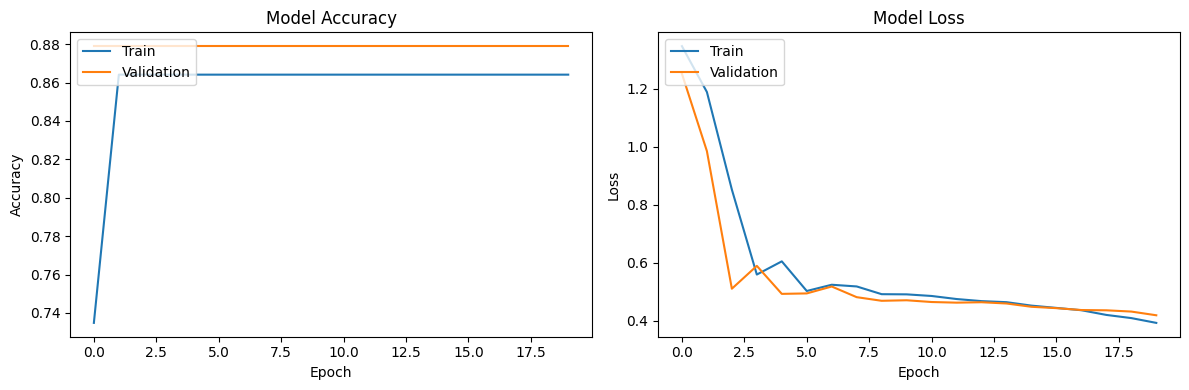

In [19]:
# Define the plot_training_history function
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualisasi Loss dan Akurasi
plot_training_history(history) # Call the function after it's defined